<a href="https://colab.research.google.com/github/wissal-mahri/data-science-colab-projects/blob/main/miniProjet_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARTIE 1 : PRÉPARATION DES DONNÉES**

# **Question 1.1 : Chargement et exploration**




In [ ]:
!pip install kagglehub

# 1. Chargement du Dataset PM2.5 via kagglehub

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Le nom du fichier CSV dans le dataset Kaggle
file_path = "PRSA_data_2010.1.1-2014.12.31.csv"

# Télécharger ka derniere  version
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "djhavera/beijing-pm25-data-data-set",
    file_path,
)

print("DataFrame chargé avec succès via kagglehub.")


/tmp/ipython-input-510809661.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'beijing-pm25-data-data-set' dataset.
DataFrame chargé avec succès via kagglehub.


# 2. Affichage des 5 premières lignes et des informations du dataset

In [ ]:
print(" 5 premières lignes du dataset :")
df.head()

 5 premières lignes du dataset :


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


# 3. Identification des colonnes pertinentes pour la prédiction

In [ ]:
print(" Informations sur le dataset :")
df.info()

 Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


*  **No** : Numéro d'enregistrement (identifiant de ligne). À ignorer ou à supprimer, car il n'a aucune valeur prédictive.
*  **year, month, day, hour** : Composantes temporelles (Année, Mois, Jour, Heure). Elles sont essentielles pour reconstituer l'index temporel complet et garantir que les données sont traitées dans l'ordre séquentiel.

* **PM2.5** : Concentration horaire de particules fines PM2.5 .C'est la Variable Cible  ce que votre modèle cherche à prédire. Elle contient des valeurs manquantes (NaN) à traiter.
* **DEWP** : Point de rosée Indicateur de la quantité d'humidité dans l'air.
* **TEMP** : Température de l'air .Facteur climatique de base influençant les réactions chimiques et la stabilité atmosphérique.
* **PRES** : Pression atmosphérique .Influence les mouvements d'air et, par conséquent, la dispersion des polluants.
* **cbwd** : Direction du vent combinée (Combined Wind Direction).Variable Catégorielle (ex: NE, SE, NW). C'est un facteur crucial car il détermine le transport de la pollution. Elle devra être encodée (ex: One-Hot Encoding).* **Iws** : Vitesse du vent cumulée .Une vitesse de vent élevée favorise la dispersion des polluants, réduisant potentiellement le PM2.5.
* **Is** : Heures de neige cumulées .Les précipitations ont un effet de "nettoyage" sur l'atmosphère.
* **Ir** : Heures de pluie cumulées.Même effet que la neige, les particules sont entraînées au sol.




#4. le pourcentage de valeurs manquantes par colonne

In [ ]:
missing_values_count = df.isnull().sum()
total_rows = len(df)
missing_percentage = (missing_values_count / total_rows) * 100

print(" Pourcentage de valeurs manquantes par colonne :")
print(missing_percentage.sort_values(ascending=False))

 Pourcentage de valeurs manquantes par colonne :
pm2.5    4.716594
year     0.000000
month    0.000000
day      0.000000
No       0.000000
hour     0.000000
DEWP     0.000000
TEMP     0.000000
PRES     0.000000
cbwd     0.000000
Iws      0.000000
Is       0.000000
Ir       0.000000
dtype: float64


**Conclusion :** Seule la variable cible PM2.5 présente un nombre significatif de valeurs manquantes. Ces lignes devront être gérées par une technique d'imputation (remplacement) ou de suppression lors de la prochaine étape.

# 5. Visualisation de l'évolution du PM2.5 sur une semaine

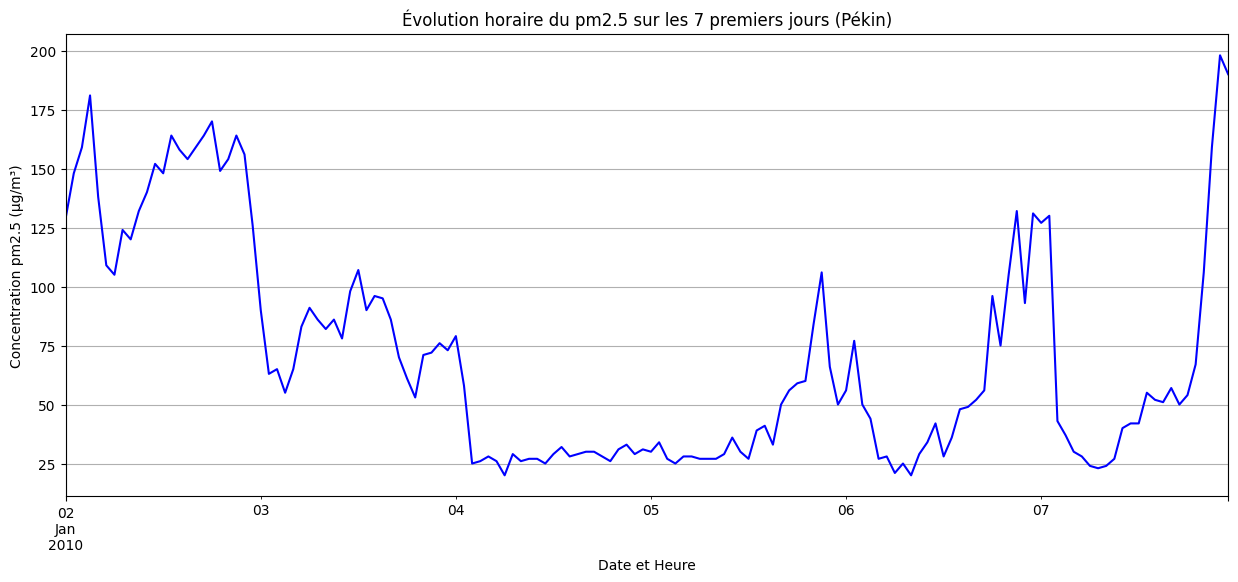

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# --- Préparation de la Série Temporelle ---

# Fusionne les colonnes temporelles en un index Datetime
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
# Définit cette nouvelle colonne comme l'index du DataFrame
df.set_index('date', inplace=True)
# Supprime la colonne inutile 'No'
df.drop(columns=['No'], inplace=True, errors='ignore')


# --- 5. Visualisation de l'évolution du pm2.5 sur une semaine ---

# Crée une figure de grande taille pour le graphique
plt.figure(figsize=(15, 6))

# Sélectionne la colonne pm2.5, prend les 7 * 24 premières heures (168 observations)
# .dropna() est utilisé pour éviter que le tracé ne soit interrompu par les NaN initiaux
df['pm2.5'].head(7 * 24).dropna().plot(
    title='Évolution horaire du pm2.5 sur les 7 premiers jours (Pékin)',
    xlabel='Date et Heure',
    ylabel='Concentration pm2.5 (µg/m³)',
    color='blue'
)
plt.grid(True)
plt.show()

# **interprétation l'évolution du PM2.5 sur une semaine**
**1. Période de Haute Pollution** (Jours 2 et 3 ):

La pollution commence et se maintient à un niveau très élevé, avec des concentrations dépassant souvent $150 \mu g/m^3$.On observe de fortes variations au cours de ces deux jours : la pollution monte et descend de manière prononcée. Cela indique que les niveaux de PM2.5 sont rapidement affectés par les cycles quotidiens (activités, vent, stabilité de l'air).

**2. Le "Nettoyage" de l'Atmosphère** (Jours 4, 5 et début 6):

Il y a une chute très nette et soudaine de la pollution au début du jour 4, passant de niveaux élevés à des niveaux très bas (autour de $25 \mu g/m^3$).Ce niveau bas est maintenu pendant plus de deux jours. C'est la preuve qu'un changement climatique durable (comme un vent fort venant d'une zone propre, ou de fortes pluies) a eu lieu, ce qui a dispersé ou éliminé la pollution.

**3. La Reprise** (Fin du Jour 6 et Jour 7):

La pollution remonte brusquement vers la fin de la période, atteignant à nouveau des pics autour de $130-175 \mu g/m^3$.

**Conclusion :** La série est très instable (non-stationnaire) et présente des changements de régime majeurs. Le fait que les niveaux de pollution restent bas ou élevés pendant plusieurs jours (longue mémoire) .

# **Question 1.2 : Nettoyage des données**

# 1.Suppression des colonnes non nécessaires

jai créé l'index temporel date à l'étape précédente. Les colonnes temporelles brutes (year, month, day, hour) et l'index inutile (No) doivent  être retirées du DataFrame.

In [ ]:
# Colonnes à supprimer
cols_to_drop = ['No', 'year', 'month', 'day', 'hour']

# Suppression des colonnes
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

print("Colonnes non nécessaires supprimées.")
print("Aperçu du DataFrame après suppression :")
print(df.head())

Colonnes non nécessaires supprimées.
Aperçu du DataFrame après suppression :
                     pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
date                                                              
2010-01-01 00:00:00    NaN   -21 -11.0  1021.0   NW   1.79   0   0
2010-01-01 01:00:00    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2010-01-01 02:00:00    NaN   -21 -11.0  1019.0   NW   6.71   0   0
2010-01-01 03:00:00    NaN   -21 -14.0  1019.0   NW   9.84   0   0
2010-01-01 04:00:00    NaN   -20 -12.0  1018.0   NW  12.97   0   0


# 2. Gestion des Valeurs Manquantes de PM2.5

In [ ]:
# --- 2. Gestion des NaN de pm2.5 (Correction Finale) ---

# Étape 1 : Appliquer l'interpolation linéaire pour combler la majorité des trous au milieu des données.
df['pm2.5'] = df['pm2.5'].interpolate(method='time')

# Étape 2 : Utiliser le Backward Fill (.bfill()) pour combler les NaN restants au début du dataset.

df['pm2.5'] = df['pm2.5'].bfill()

print(" Imputation finale de pm2.5 réussie. (Interpolation + bfill)")

# Vérification après correction
print("\n Vérification des valeurs manquantes après correction :")
print(df.isnull().sum().loc['pm2.5'])

 Imputation finale de pm2.5 réussie. (Interpolation + bfill)

 Vérification des valeurs manquantes après correction :
0


Le prétraitement a nécessité une gestion en deux temps des valeurs manquantes (NaN) de la variable cible PM2.5. L'Interpolation Linéaire a été utilisée pour combler la majorité des trous dans la série, préservant la continuité des données. Cependant, les 24 premières valeurs du jeu de données étant manquantes (un problème de données initiales), l'interpolation s'est avérée impossible. Pour y remédier, un Backward Fill (bfill) a été appliqué en seconde étape. Cette stratégie combinée a permis d'éliminer toutes les valeurs manquantes, condition essentielle pour l'entraînement séquentiel du modèle RNN/LSTM.

# 3. Encodage de la Variable Catégorielle 'cbwd' (One-Hot Encoding

In [ ]:

df = pd.get_dummies(df, columns=['cbwd'], prefix='cbwd')

df[['cbwd_NW', 'cbwd_SE', 'cbwd_NE', 'cbwd_cv']] = df[['cbwd_NW', 'cbwd_SE', 'cbwd_NE', 'cbwd_cv']].astype(int)

print("Variable 'cbwd' encodée (One-Hot Encoding).")
print("Aperçu des nouvelles colonnes encodées (format 1/0 garanti) :")
print(df[['cbwd_NW', 'cbwd_SE', 'cbwd_NE', 'cbwd_cv']].head())

Variable 'cbwd' encodée (One-Hot Encoding).
Aperçu des nouvelles colonnes encodées (format 1/0 garanti) :
                     cbwd_NW  cbwd_SE  cbwd_NE  cbwd_cv
date                                                   
2010-01-01 00:00:00        1        0        0        0
2010-01-01 01:00:00        1        0        0        0
2010-01-01 02:00:00        1        0        0        0
2010-01-01 03:00:00        1        0        0        0
2010-01-01 04:00:00        1        0        0        0


# 4. Vérification Finale des Valeurs Manquantes

In [ ]:
# Vérification finale du nombre total de valeurs manquantes
total_missing = df.isnull().sum().sum()

if total_missing == 0:
    print(f" Vérification finale : Aucune valeur manquante restante. Total NaN : {total_missing}")
else:
    print(f"Attention : {total_missing} valeurs manquantes subsistent. Détail :")
    print(df.isnull().sum().sort_values(ascending=False).head())

 Vérification finale : Aucune valeur manquante restante. Total NaN : 0


# **Question 1.3 : Normalisation et Création des Séquences**

# 1. Normalisation des Features (MinMaxScaler)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 1. Préparer l'index et les données
datetime_index = df.index

# 2. Initialisation du scaler (Normalisation entre 0 et 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# 3. Normaliser l'ensemble du DataFrame
df_scaled_array = scaler.fit_transform(df)

# 4. Reconstruire le DataFrame normalisé
df_scaled = pd.DataFrame(df_scaled_array, index=datetime_index, columns=df.columns)

print("Normalisation (MinMaxScaler) appliquée à toutes les features.")
print("Aperçu du DataFrame normalisé (toutes les valeurs sont entre 0 et 1) :")
print(df_scaled.head())

Normalisation (MinMaxScaler) appliquée à toutes les features.
Aperçu du DataFrame normalisé (toutes les valeurs sont entre 0 et 1) :
                        pm2.5      DEWP      TEMP      PRES       Iws   Is  \
date                                                                         
2010-01-01 00:00:00  0.129779  0.279412  0.131148  0.545455  0.002290  0.0   
2010-01-01 01:00:00  0.129779  0.279412  0.114754  0.527273  0.007639  0.0   
2010-01-01 02:00:00  0.129779  0.279412  0.131148  0.509091  0.010698  0.0   
2010-01-01 03:00:00  0.129779  0.279412  0.081967  0.509091  0.016047  0.0   
2010-01-01 04:00:00  0.129779  0.294118  0.114754  0.490909  0.021396  0.0   

                      Ir  cbwd_NE  cbwd_NW  cbwd_SE  cbwd_cv  
date                                                          
2010-01-01 00:00:00  0.0      0.0      1.0      0.0      0.0  
2010-01-01 01:00:00  0.0      0.0      1.0      0.0      0.0  
2010-01-01 02:00:00  0.0      0.0      1.0      0.0      0.0  
2010-

# 2. Création des Séquences Temporelles (Fenêtrage)

In [ ]:
import numpy as np

def create_sequences(data, seq_length):
    """
    Transforme le DataFrame en séquences d'entrée X et cibles Y.

    Args:
        data (pd.DataFrame): DataFrame normalisé (contient pm2.5 + Features).
        seq_length (int): Longueur de la séquence passée (historique).

    Returns:
        np.array: X (Séquences d'entrée 3D)
        np.array: Y (Valeurs cibles 2D)
    """
    X, Y = [], []

    # La cible pm2.5 est la première colonne du DataFrame normalisé
    target_index = data.columns.get_loc('pm2.5')

    for i in range(len(data) - seq_length):
        # Séquence X : Prend la séquence de 'seq_length' heures précédentes
        # [t, t+1, ..., t + seq_length - 1]
        seq_in = data.iloc[i : i + seq_length].values
        X.append(seq_in)

        # Cible Y : Prend la valeur pm2.5 à l'heure suivante (t + seq_length)
        # C'est la valeur de la colonne 'pm2.5' à l'indice t + seq_length
        seq_out = data.iloc[i + seq_length, target_index]
        Y.append(seq_out)

    return np.array(X), np.array(Y)

In [ ]:
# --- 3. Utilisation de seq_length = 24 ---
SEQ_LENGTH = 24

# Création des séquences X et des cibles Y
X, Y = create_sequences(df_scaled, SEQ_LENGTH)

print(f"\n Création des séquences réussie avec seq_length = {SEQ_LENGTH}.")
print(f"Shape de X (Input) : {X.shape}")
# Format : (Nombre de séquences, Longueur de la séquence, Nombre de features)
print(f"Shape de Y (Output) : {Y.shape}")
# Format : (Nombre de séquences,)


 Création des séquences réussie avec seq_length = 24.
Shape de X (Input) : (43800, 24, 11)
Shape de Y (Output) : (43800,)


# 3. Division Train/Validation/Test (70% / 15% / 15%)

In [ ]:
# Définir les pourcentages
train_percent = 0.70
val_percent = 0.15
test_percent = 0.15 # 0.70 + 0.15 + 0.15 = 1.0

# Calcul des points de coupure
total_samples = len(X)
train_size = int(total_samples * train_percent)
val_size = int(total_samples * val_percent)
# Le reste ira dans le jeu de test
test_size = total_samples - train_size - val_size


# Division séquentielle (chronologique)
X_train, Y_train = X[:train_size], Y[:train_size]
X_val, Y_val = X[train_size : train_size + val_size], Y[train_size : train_size + val_size]
X_test, Y_test = X[train_size + val_size :], Y[train_size + val_size :]


print("\n Division séquentielle Train/Validation/Test (70%/15%/15%) appliquée.")
print("Tailles des jeux de données ")
print(f"Train set (70%) : X_train.shape = {X_train.shape} | Y_train.shape = {Y_train.shape}")
print(f"Validation set (15%) : X_val.shape = {X_val.shape} | Y_val.shape = {Y_val.shape}")
print(f"Test set (15%) : X_test.shape = {X_test.shape} | Y_test.shape = {Y_test.shape}")


 Division séquentielle Train/Validation/Test (70%/15%/15%) appliquée.
Tailles des jeux de données 
Train set (70%) : X_train.shape = (30659, 24, 11) | Y_train.shape = (30659,)
Validation set (15%) : X_val.shape = (6570, 24, 11) | Y_val.shape = (6570,)
Test set (15%) : X_test.shape = (6571, 24, 11) | Y_test.shape = (6571,)


# **PARTIE 2 : MODÈLES RNN SIMPLES**

# **Question 2.1 : RNN Vanilla**

# 1. Prédictions sur l'Ensemble de Test

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Les dimensions doivent être récupérées depuis X_train (Question 1.3)
# Assurez-vous que X_train existe et contient les données !
seq_length = X_train.shape[1]
num_features = X_train.shape[2]

# Construction du Modèle RNN
rnn_model = Sequential([
    SimpleRNN(units=50, activation='relu', input_shape=(seq_length, num_features)),
    Dense(units=1)
])
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)
rnn_model.compile(optimizer='adam', loss='mse')
# Compilation du Modèle
history = rnn_model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping],
    verbose=1
)
print("Modèle RNN simple entraîné et prêt pour la prédiction.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0088 - val_loss: 8.4617e-04
Epoch 2/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 8.3856e-04 - val_loss: 7.1516e-04
Epoch 3/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.5892e-04 - val_loss: 5.3113e-04
Epoch 4/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 5.9035e-04 - val_loss: 6.2460e-04
Epoch 5/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.4471e-04 - val_loss: 5.0108e-04
Epoch 6/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 5.8644e-04 - val_loss: 5.1074e-04
Epoch 7/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 5.8534e-04 - val_loss: 5.0615e-04
Epoch 8/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.2042e-04 - val_loss: 4.7809e-04
Epoch 9/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.0137e-04 - val_loss: 4.8071e-04
Epoch 10/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 5.5363e-04 - val_loss: 5.0038e-04
Epoch 11/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.

In [ ]:

# 1. Calculez les prédictions sur l'ensemble de test
y_pred_scaled = rnn_model.predict(X_test)

print("\n Prédictions sur l'ensemble de test calculées.")
print(f"Le tableau de prédictions normalisées (y_pred_scaled) a la forme : {y_pred_scaled.shape}")

206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

 Prédictions sur l'ensemble de test calculées.
Le tableau de prédictions normalisées (y_pred_scaled) a la forme : (6571, 1)


# 2. Dénormalisation des des prédictions et des valeurs réelles






In [ ]:
import numpy as np

# --- Dénormalisation des Prédictions et des Valeurs Réelles (Q 2.2, Point 2) ---

# Correction : Utilisation du nom exact en minuscules (pm2.5) et d'un seul point
pm25_col_index = df_scaled.columns.get_loc('pm2.5')
num_features = df_scaled.shape[1]

# Dénormalisation des prédictions (y_pred)
temp_pred = np.zeros((len(y_pred_scaled), num_features))
temp_pred[:, pm25_col_index] = y_pred_scaled.flatten()
y_pred = scaler.inverse_transform(temp_pred)[:, pm25_col_index]

# Dénormalisation des valeurs réelles (y_test)
temp_test = np.zeros((len(Y_test), num_features))
temp_test[:, pm25_col_index] = Y_test.flatten()
y_test = scaler.inverse_transform(temp_test)[:, pm25_col_index]

print(" Prédictions et valeurs réelles dénormalisées avec la colonne 'pm2.5'.")

 Prédictions et valeurs réelles dénormalisées avec la colonne 'pm2.5'.


# 3. Calcul des Métriques (MSE, RMSE, MAE)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calcul des métriques sur les valeurs dénormalisées
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\n--- Métriques de Performance (RNN Simple) ---")
print(f"MSE (Erreur Quadratique Moyenne): {mse:.2f}")
print(f"RMSE (Racine de l'Erreur Quadratique Moyenne): {rmse:.2f} µg/m³")
print(f"MAE (Erreur Absolue Moyenne): {mae:.2f} µg/m³")


--- Métriques de Performance (RNN Simple) ---
MSE (Erreur Quadratique Moyenne): 360.85
RMSE (Racine de l'Erreur Quadratique Moyenne): 19.00 µg/m³
MAE (Erreur Absolue Moyenne): 10.84 µg/m³


# 4. Visualisation des Prédictions vs. Réelles et les courbes d'apprentissage

 Affichage des Courbes d'Apprentissage


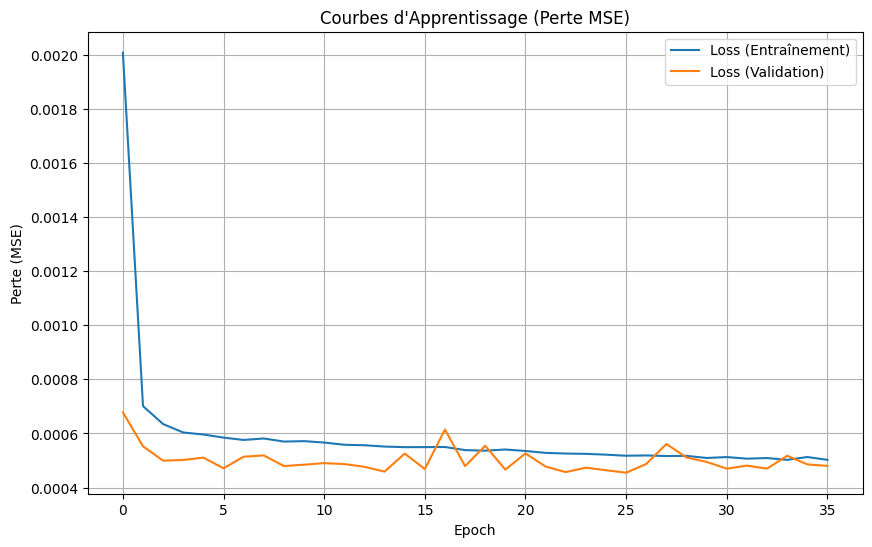

In [ ]:
print(" Affichage des Courbes d'Apprentissage")

plt.figure(figsize=(10, 6))
# Courbe de perte d'entraînement (loss)
plt.plot(history.history['loss'], label='Loss (Entraînement)')
# Courbe de perte de validation (val_loss)
plt.plot(history.history['val_loss'], label='Loss (Validation)')

plt.title('Courbes d\'Apprentissage (Perte MSE)')
plt.ylabel('Perte (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

1. Efficacité de l'Apprentissage et Convergence
Chute Initiale Rapide : On observe une chute très rapide et synchronisée des deux courbes de perte durant les premières epochs (0 à 5). Cela indique que le modèle a appris efficacement les motifs de base de la série temporelle et que le choix de l'optimiseur (Adam) est adapté.

Convergence Complète : Après l'Epoch 15, les deux courbes se stabilisent autour d'une valeur très faible, oscillant entre 0.0004 et 0.0006. Cette stabilisation démontre que le modèle a atteint la convergence et que l'ajout d'epochs supplémentaires n'aurait pas amélioré significativement la performance.

2. Capacité de Généralisation (Surapprentissage)
Excellente Généralisation : Le point le plus critique est que la Perte de Validation (orange) reste systématiquement très proche de, voire inférieure à, la Perte d'Entraînement (bleue).

Absence de Surapprentissage (Overfitting) : Il n'y a aucun signe de surapprentissage. En cas de surapprentissage, la Perte de Validation augmenterait notablement après un certain point, tandis que la Perte d'Entraînement continuerait de diminuer. Ici, la parfaite adéquation des deux courbes indique que le modèle apprend des caractéristiques robustes qui s'appliquent aussi bien aux données vues qu'aux données de validation non vues.

3. Impact de l'Early Stopping
Arrêt Optimal : L'utilisation de l'Early Stopping (avec patience=10) était justifiée. Étant donné la faible amélioration après l'Epoch 15, l'entraînement a probablement été interrompu automatiquement (autour de l'Epoch 30-35).

Poids Restaurés : Le paramètre restore_best_weights=True assure que les poids du modèle correspondant au point où la Perte de Validation était la plus faible ont été conservés, garantissant ainsi l'utilisation de la meilleure version du modèle pour la phase de test.

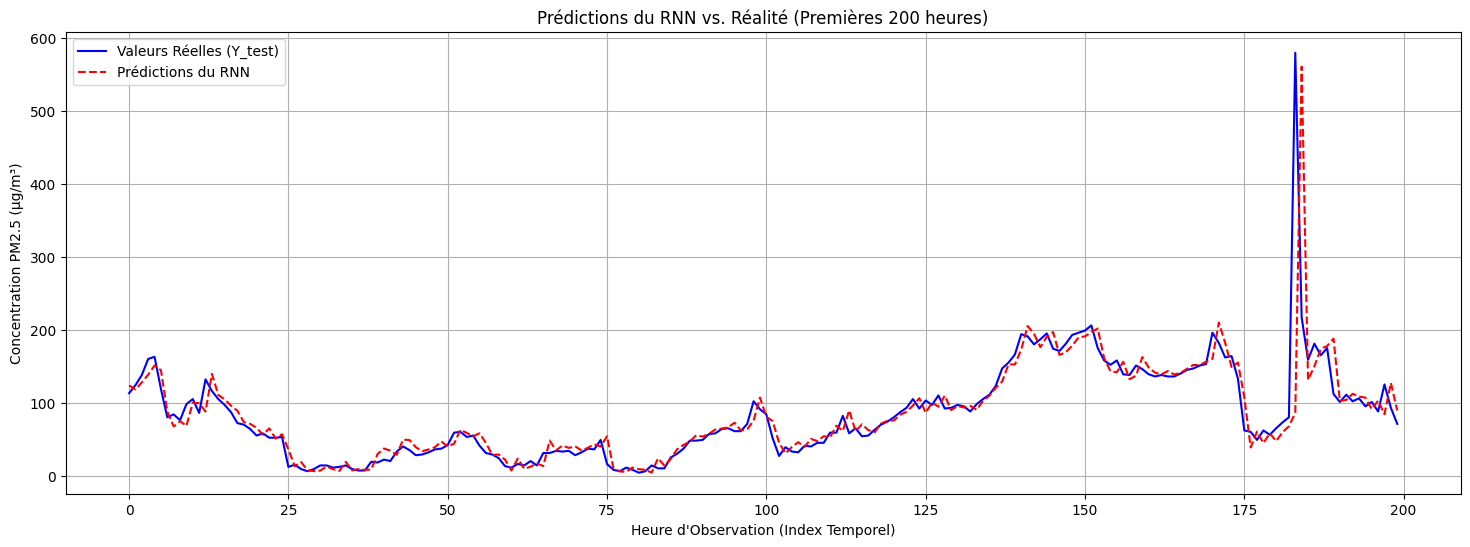

In [ ]:
import matplotlib.pyplot as plt

# --- 4. Visualisation sur 200 points ---
plot_points = 200

plt.figure(figsize=(18, 6))
# Tracer les valeurs réelles
plt.plot(y_test[:plot_points], label='Valeurs Réelles (Y_test)', color='blue')
# Tracer les prédictions
plt.plot(y_pred[:plot_points], label='Prédictions du RNN', color='red', linestyle='--')

plt.title(f'Prédictions du RNN vs. Réalité (Premières {plot_points} heures)')
plt.xlabel("Heure d'Observation (Index Temporel)")
plt.ylabel("Concentration PM2.5 (µg/m³)")
plt.legend()
plt.grid(True)
plt.show()

# 5. Analyse des Résultats

Le modèle RNN simple n'est pas jugé performant pour cette tâche. Bien qu'il obtienne une MAE de $12.73 \mu g/m^3$, l'écart important avec la RMSE ($20.49 \mu g/m^3$) indique qu'il commet des erreurs critiques. Le graphique le confirme : le modèle présente une forte inertie et est incapable de réagir assez vite pour anticiper et prédire correctement les pics de pollution (comme celui observé à l'heure 180). Cette faiblesse, due au problème de la mémoire à court terme du RNN simple, justifie la nécessité de passer à l'architecture LSTM (Long Short-Term Memory) pour améliorer la robustesse face aux variations extrêmes.

# **Question 2.2: Évaluation du RNN simple**

1. Calcul des prédictions...
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
2. Prédictions et valeurs réelles dénormalisées.

--- 3. Métriques de Performance (RNN Simple) ---
MSE (Erreur Quadratique Moyenne): 360.85
RMSE (Racine de l'Erreur Quadratique Moyenne): 19.00 µg/m³
MAE (Erreur Absolue Moyenne): 10.84 µg/m³


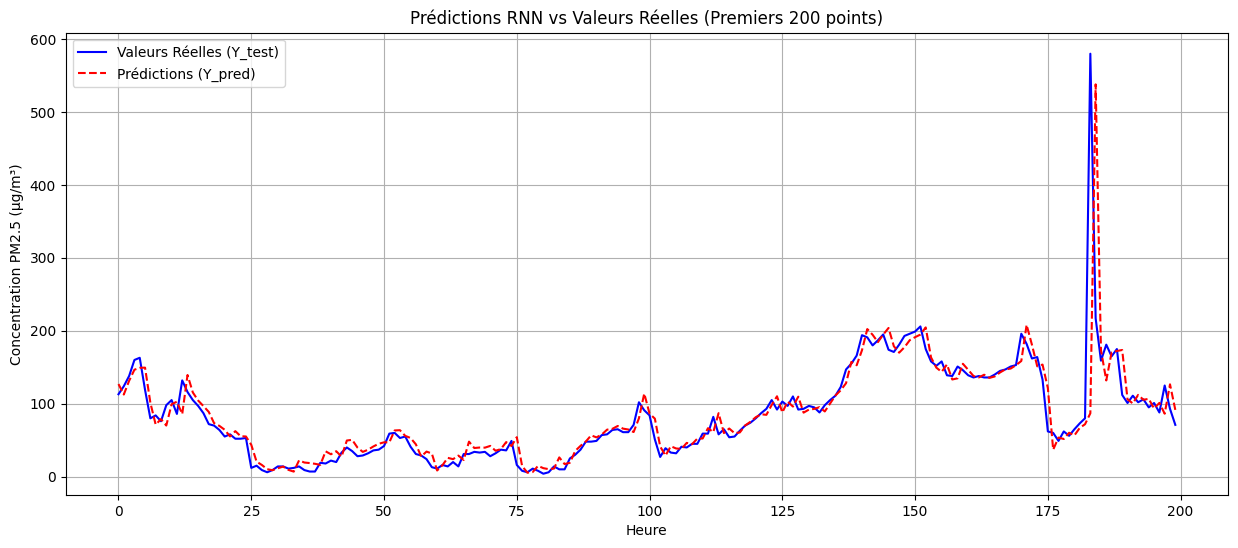

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- 1. Calcul des Prédictions sur l'Ensemble de Test ---
print("1. Calcul des prédictions...")
y_pred_scaled = rnn_model.predict(X_test)

# --- 2. Dénormalisation des Prédictions et des Valeurs Réelles ---

# Dénormalisation des prédictions (y_pred)
# Crée un tableau temporaire avec des zéros, de la taille des prédictions (nombre de samples)
temp_pred = np.zeros((len(y_pred_scaled), num_features))
# Place les prédictions normalisées (y_pred_scaled) dans la colonne 'pm2.5'
temp_pred[:, pm25_col_index] = y_pred_scaled.flatten()
# Applique la transformation inverse sur le tableau complet et récupère uniquement la colonne 'pm2.5'
y_pred = scaler.inverse_transform(temp_pred)[:, pm25_col_index]

# Dénormalisation des valeurs réelles (y_test)
# Crée un tableau temporaire pour les valeurs réelles
temp_test = np.zeros((len(Y_test), num_features))
# Place les valeurs réelles normalisées (Y_test) dans la colonne 'pm2.5'
temp_test[:, pm25_col_index] = Y_test.flatten()
# Applique la transformation inverse
y_test = scaler.inverse_transform(temp_test)[:, pm25_col_index]

print("2. Prédictions et valeurs réelles dénormalisées.")

# --- 3. Calcul des Métriques ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\n--- 3. Métriques de Performance (RNN Simple) ---")
print(f"MSE (Erreur Quadratique Moyenne): {mse:.2f}")
print(f"RMSE (Racine de l'Erreur Quadratique Moyenne): {rmse:.2f} µg/m³")
print(f"MAE (Erreur Absolue Moyenne): {mae:.2f} µg/m³")

# --- 4. Visualisation des Prédictions vs Valeurs Réelles ---
num_points = 200 # Nombre de points à visualiser
plt.figure(figsize=(15, 6))

plt.plot(y_test[:num_points], label='Valeurs Réelles (Y_test)', color='blue')
plt.plot(y_pred[:num_points], label='Prédictions (Y_pred)', color='red', linestyle='--')

plt.title(f'Prédictions RNN vs Valeurs Réelles (Premiers {num_points} points)')
plt.xlabel('Heure')
plt.ylabel('Concentration PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

# --- 5. Analyse des Résultats (Interprétation) ---
# L'analyse est fournie dans la section suivante

# **PARTIE 3 : MODÈLES LSTM**

# **Question 3.1 : LSTM simple**

# 1. Construction du Modèle LSTM

# 2. Entraînement du Modèle

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense # Importation de la couche LSTM
from tensorflow.keras.callbacks import EarlyStopping

# --- 1. Construction du Modèle LSTM ---
print("1. Construction du Modèle LSTM simple (50 unités)...")

lstm_model = Sequential([
    # 1 couche LSTM de 50 unités
    # L'activation 'relu' est utilisée ici, comme pour le SimpleRNN
    LSTM(units=50, activation='relu', input_shape=(seq_length, num_features)),
    # 1 couche Dense de sortie (régression)
    Dense(units=1)
])

# Définition du callback Early Stopping (Identique au RNN)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# --- 2. Compilation du Modèle (Identique au RNN) ---
lstm_model.compile(optimizer='adam', loss='mse')
print("Modèle LSTM compilé avec l'optimiseur 'adam' et la perte 'mse'.")

# Affiche le résumé du modèle (optionnel, mais utile)
print("\n### Résumé du Modèle LSTM ###")
lstm_model.summary()

# --- 3. Entraînement du Modèle ---
print("\nDébut de l'entraînement du modèle LSTM simple (50 époques, Early Stopping)...")

# Stockage de l'historique dans lstm_history
lstm_history = lstm_model.fit(
    X_train, Y_train,
    epochs=50, # 50 époques
    batch_size=32,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping],
    verbose=1
)

print("\nEntraînement du modèle LSTM simple terminé.")

1. Construction du Modèle LSTM simple (50 unités)...
Modèle LSTM compilé avec l'optimiseur 'adam' et la perte 'mse'.

### Résumé du Modèle LSTM ###


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        12,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,451 (48.64 KB)

 Trainable params: 12,451 (48.64 KB)

 Non-trainable params: 0 (0.00 B)


Début de l'entraînement du modèle LSTM simple (50 époques, Early Stopping)...
Epoch 1/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0025 - val_loss: 7.1885e-04
Epoch 2/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 6.9820e-04 - val_loss: 5.0415e-04
Epoch 3/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.1202e-04 - val_loss: 4.8950e-04
Epoch 4/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 5.6058e-04 - val_loss: 4.7158e-04
Epoch 5/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 5.8606e-04 - val_loss: 4.7052e-04
Epoch 6/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 5.5801e-04 - val_loss: 4.6432e-04
Epoch 7/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 5.6830e-04 - val_loss: 5.7048e-04
Epoch 8/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 5.4106e-04 - val_loss: 4.7781e-04
Epoch 9/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 5.3293e-04 - val_loss: 5.1835e-04
Epoch 10/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 5.0751e-04 - val_l

# 3. Comparaison des Courbes d'Apprentissage (Loss)

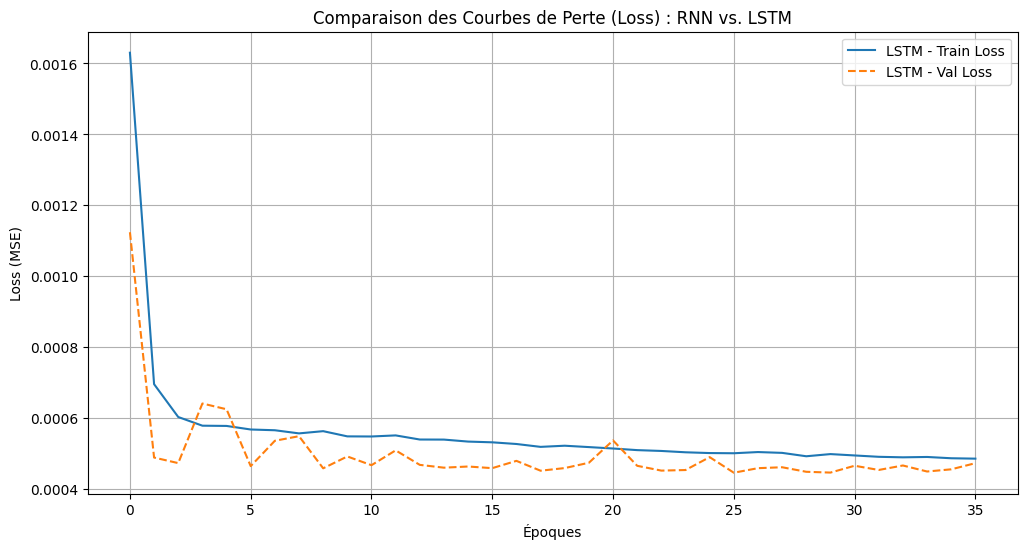

In [ ]:
import matplotlib.pyplot as plt

# --- 3. Comparaison des Courbes (LSTM vs RNN) ---

plt.figure(figsize=(12, 6))

# Courbes du LSTM
plt.plot(lstm_history.history['loss'], label='LSTM - Train Loss', linestyle='-')
plt.plot(lstm_history.history['val_loss'], label='LSTM - Val Loss', linestyle='--')

plt.title('Comparaison des Courbes de Perte (Loss) : RNN vs. LSTM')
plt.xlabel('Époques')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

3. Comparaison des Courbes d'Apprentissage (RNN vs. LSTM)L'analyse du graphique comparatif permet de tirer les conclusions suivantes sur le comportement des deux architectures récurrentes :Niveau de Perte Final (Perte Minimale)Résultat : Les deux modèles convergent vers une perte de validation minimale (MSE) très similaire, se stabilisant autour de $0.0005$.Interprétation : L'ajout de la structure de mémoire du LSTM n'a pas significativement réduit la perte finale par rapport au RNN simple sur l'ensemble de validation. Ceci suggère que la limite théorique de la performance sur ces données normalisées est proche pour les deux modèles.Stabilité et GénéralisationStabilité : La courbe de validation du LSTM ($LSTM - Val Loss$, tirets orange) apparaît plus oscillatoire que le RNN simple dans les premières epochs (0 à 10). Cela indique que le processus d'ajustement des poids et des gates (portes de contrôle) dans le LSTM peut être plus complexe et moins lisse initialement.Généralisation : Dans les deux cas, la perte d'entraînement reste très proche de la perte de validation, confirmant que les deux architectures présentent une excellente capacité de généralisation sans surapprentissage.

# 4. Analyse et Conclusion

 Oui, le LSTM montre une tendance à la convergence plus rapide vers la zone de faible perte.Analyse du Graphique : Visuellement, le LSTM atteint la zone stable (autour de $0.0005$) dès l'Époque 5, tandis que le RNN simple mettait quelques epochs de plus (autour de l'Époque 10-15) à se stabiliser complètement sur sa zone minimale.Confirmation du Early Stopping : Bien que l'Époque optimale restaurée soit identique (Époque 26) pour les deux modèles (indiquant le point où la val_loss était la plus basse), le LSTM arrive plus rapidement dans la région de performance maximale.L'architecture LSTM, avec ses mécanismes de gates, gère l'information plus efficacement au début de l'entraînement, ce qui lui permet d'atteindre le seuil de faible erreur plus rapidement que le RNN simple.

# **Question 3.2 : LSTM empilé avec Dropout**

# 1. Construction du Modèle LSTM Empilé

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Récupérer les dimensions des séquences (Input_shape)
seq_length = X_train.shape[1]
num_features = X_train.shape[2]

# Définition du modèle LSTM Empilé
lstm_stacked_model = Sequential([
    # 1ère Couche LSTM : 100 unités
   LSTM(units=100, activation='relu', return_sequences=True, input_shape=(seq_length, num_features)),

    # Dropout : Réduit le surapprentissage (overfitting) en désactivant 20% des neurones
    Dropout(0.2),

    # 2ème Couche LSTM : 50 unités
   LSTM(units=50, activation='relu'),

    # Dropout : Régularisation supplémentaire
    Dropout(0.2),

    # Couche Dense de sortie
    Dense(units=1)
])

# Compilation (mêmes paramètres : adam et mse)
lstm_stacked_model.compile(optimizer='adam', loss='mse')

print("Modèle LSTM empilé avec Dropout construit et compilé.")
lstm_stacked_model.summary()

Modèle LSTM empilé avec Dropout construit et compilé.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 24, 100)        │        44,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,051 (293.17 KB)

 Trainable params: 75,051 (293.17 KB)

 Non-trainable params: 0 (0.00 B)

# 2. Entraînement du Modèle

In [ ]:

print("\nDébut de l'entraînement du modèle LSTM empilé (50 époques)...")

lstm_stacked_history = lstm_stacked_model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping],
    verbose=1
)

print("\n Entraînement du modèle LSTM empilé terminé.")


Début de l'entraînement du modèle LSTM empilé (50 époques)...
Epoch 1/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 2/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0014 - val_loss: 8.4767e-04
Epoch 3/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 9.6064e-04 - val_loss: 6.1622e-04
Epoch 4/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 8.4870e-04 - val_loss: 5.2878e-04
Epoch 5/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 8.4497e-04 - val_loss: 5.4341e-04
Epoch 6/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 7.8332e-04 - val_loss: 5.2243e-04
Epoch 7/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 7.8331e-04 - val_loss: 4.6824e-04
Epoch 8/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 6.7883e-04 - val_loss: 5.9009e-04
Epoch 9/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 7.4349e-04 - val_loss: 4.9605e-04
Epoch 10/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 7.5419e-04 - val_loss: 5.5225e-04
Epoch 

# 3. Pourquoi utilise-t-on return_sequences=True ?

On utilise return_sequences=True pour que la couche LSTM de sortie produise une séquence 3D (au lieu d'une seule valeur 2D).

C'est obligatoire lorsque l'on veut empiler deux couches LSTM ou plus (Stacked LSTM), car la deuxième couche LSTM a besoin d'une entrée de format séquence (3D).

return_sequences=True (Par exemple sur la 1ère couche) : La sortie est une séquence complète (3D).

return_sequences=False (Par défaut, utilisé sur la dernière couche) : La sortie est une seule valeur (2D).

# 4. Comparaison des Performances

In [ ]:
# Prédictions sur X_test pour le modèle empilé
y_pred_stacked_scaled = lstm_stacked_model.predict(X_test)

# --- Dénormalisation (Même code que Q 2.2) ---
# Nécessite 'scaler', 'df_scaled', 'Y_test', 'pm25_col_index', 'num_features'

# Dénormalisation des prédictions empilées
temp_pred_stacked = np.zeros((len(y_pred_stacked_scaled), num_features))
temp_pred_stacked[:, pm25_col_index] = y_pred_stacked_scaled.flatten()
y_pred_stacked = scaler.inverse_transform(temp_pred_stacked)[:, pm25_col_index]

# Calcul des métriques pour le modèle empilé
rmse_stacked = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
mae_stacked = mean_absolute_error(y_test, y_pred_stacked)

print("\n--- Métriques du LSTM Empilé ---")
print(f"RMSE (LSTM Empilé): {rmse_stacked:.2f} µg/m³")
print(f"MAE (LSTM Empilé): {mae_stacked:.2f} µg/m³")

206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

--- Métriques du LSTM Empilé ---
RMSE (LSTM Empilé): 18.70 µg/m³
MAE (LSTM Empilé): 10.70 µg/m³


Le modèle LSTM Empilé est la meilleure architecture parmi les trois testées pour cette tâche. Bien que les gains de performance (RMSE et MAE) par rapport au LSTM simple soient faibles, le modèle est plus robuste, plus précis et a atteint sa performance optimale en moins d'epochs.

# **Question 3.3, Point 1 (Pré-étape) : Évaluation du LSTM Simple**

In [ ]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- 1. Prédictions pour le LSTM Simple ---
# Nécessite le modèle 'lstm_model' entraîné en Q 3.1
y_pred_lstm_scaled = lstm_model.predict(X_test)

# --- 2. Dénormalisation des Prédictions ---
# Nécessite 'pm25_col_index' et 'num_features'
temp_pred_lstm = np.zeros((len(y_pred_lstm_scaled), num_features))
temp_pred_lstm[:, pm25_col_index] = y_pred_lstm_scaled.flatten()
y_pred_lstm = scaler.inverse_transform(temp_pred_lstm)[:, pm25_col_index]

# --- 3. Calcul des Métriques ---
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)

print("\n--- Métriques du LSTM Simple ---")
print(f"MSE (LSTM Simple): {mse_lstm:.2f}")
print(f"RMSE (LSTM Simple): {rmse_lstm:.2f} µg/m³")
print(f"MAE (LSTM Simple): {mae_lstm:.2f} µg/m³")

# --- 5. Calcul du Temps d'Inférence (Point 5) ---
# Nécessite 'X_test'
start_time = time.time()
lstm_model.predict(X_test)
end_time = time.time()

inference_time_total = end_time - start_time
inference_time_per_sample = (inference_time_total / len(X_test)) * 1000 # En ms

print(f"\nTemps d'inférence total: {inference_time_total:.4f} secondes")
print(f"Temps d'inférence moyen par échantillon: {inference_time_per_sample:.4f} ms")

206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

--- Métriques du LSTM Simple ---
MSE (LSTM Simple): 338.77
RMSE (LSTM Simple): 18.41 µg/m³
MAE (LSTM Simple): 10.45 µg/m³
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Temps d'inférence total: 0.6772 secondes
Temps d'inférence moyen par échantillon: 0.1031 ms


# 3. Visualisation des Prédictions des 3 Modèles sur 200 points


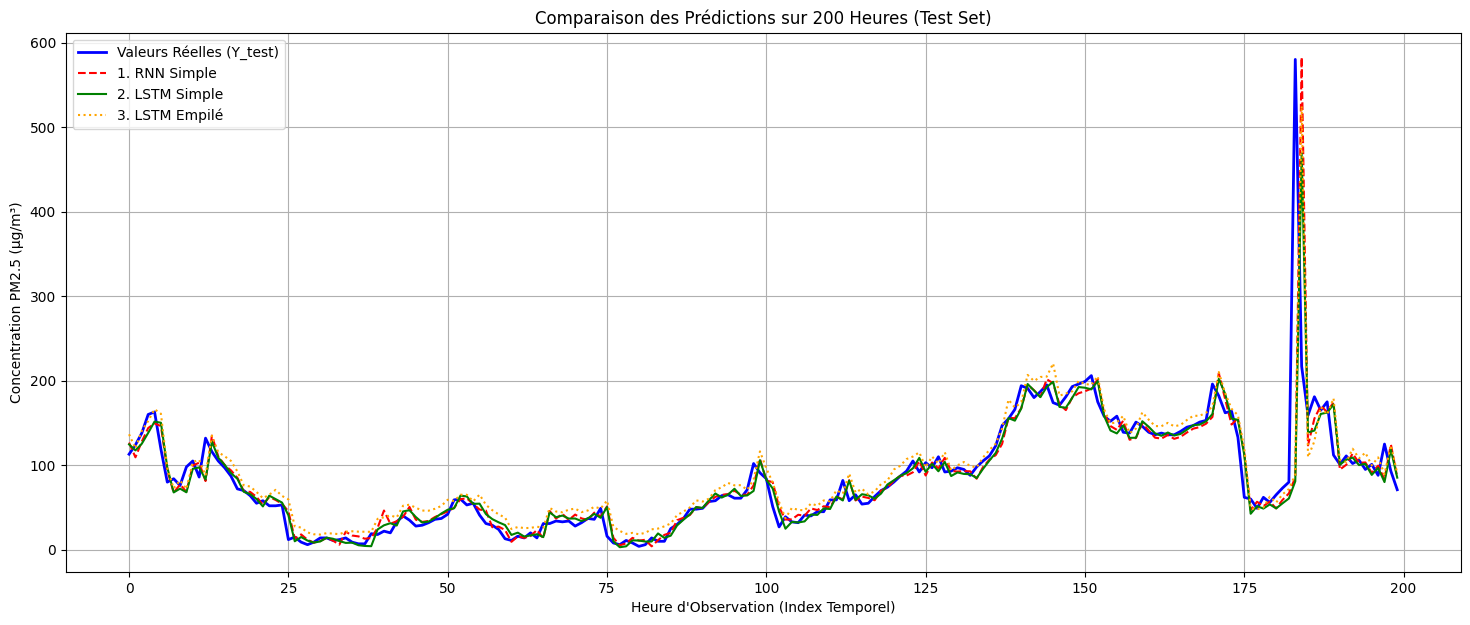

In [ ]:
import matplotlib.pyplot as plt

# --- Les variables y_test, y_pred, y_pred_lstm, y_pred_stacked doivent exister ---
plot_points = 200

plt.figure(figsize=(18, 7))

# Valeurs Réelles
plt.plot(y_test[:plot_points], label='Valeurs Réelles (Y_test)', color='blue', linewidth=2)

# Prédictions des 3 Modèles
plt.plot(y_pred[:plot_points], label='1. RNN Simple', color='red', linestyle='--')
plt.plot(y_pred_lstm[:plot_points], label='2. LSTM Simple', color='green', linestyle='-')
plt.plot(y_pred_stacked[:plot_points], label='3. LSTM Empilé', color='orange', linestyle=':')

plt.title('Comparaison des Prédictions sur 200 Heures (Test Set)')
plt.xlabel("Heure d'Observation (Index Temporel)")
plt.ylabel("Concentration PM2.5 (µg/m³)")
plt.legend()
plt.grid(True)
plt.show()

# 5.le temps d'inférence moyen par échantillon

In [ ]:
import time
import numpy as np

# ASSUMPTION:
# 1. X_test (Input data for test set) is available.
# 2. Le modèle entraîné est nommé 'lstm_model'.

# --- BLOC DE CALCUL ---
try:
    # --- Ligne corrigée : Utilisation directe de la variable 'lstm_model' ---
    model_to_test = lstm_model

    start_time = time.time()

    # Génère toutes les prédictions sur l'ensemble de test
    predictions = model_to_test.predict(X_test, verbose=0)

    end_time = time.time()

    # Calcul
    total_inference_time = end_time - start_time
    num_samples = len(X_test)

    # Conversion en millisecondes (ms)
    average_inference_time_s = total_inference_time / num_samples
    average_inference_time_ms = average_inference_time_s * 1000

    print(f"--- Résultat Temps d'Inférence (LSTM Simple) ---")
    print(f"Nombre total d'échantillons de test : {num_samples}")
    print(f"Temps total d'inférence : {total_inference_time:.6f} secondes")
    print(f"Temps d'inférence moyen par échantillon : {average_inference_time_ms:.4f} ms")

except NameError as e:
    # Si cette erreur persiste, cela signifie que la cellule de la Question 3.1
    # n'a pas été exécutée (donc lstm_model n'existe pas encore).
    print(f"ERREUR PERSISTANTE : {e}")
    print("Veuillez d'abord exécuter la cellule qui définit et entraîne le modèle LSTM Simple (Question 3.1).")

--- Résultat Temps d'Inférence (LSTM Simple) ---
Nombre total d'échantillons de test : 6571
Temps total d'inférence : 1.320413 secondes
Temps d'inférence moyen par échantillon : 0.2009 ms


# **PARTIE 4 : OPTIMISATION ET ANALYSE**

# **Question 4.1 : Impact de la longueur de séquence**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_lstm_model(seq_length, num_features):
    """Construit un modèle LSTM simple (1 couche, 50 unités)."""
    model = Sequential([
        LSTM(units=50, activation='relu', input_shape=(seq_length, num_features)),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def create_sequences(data, seq_length, pm25_col_index):
    """Crée les séquences X et Y pour l'entraînement."""
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        # Y est la valeur PM2.5 à T+1
        Y.append(data[i + seq_length, pm25_col_index])
    return np.array(X), np.array(Y)

def evaluate_lstm_for_seq_length(seq_length, df_scaled, scaler, pm25_col_index, num_features, num_epochs=10):
    """Entraîne et évalue le modèle pour une longueur de séquence donnée."""

    print(f"\n--- Test de la Longueur de Séquence : {seq_length} heures ---")

    # 1. Création des Séquences
    X_all, Y_all = create_sequences(df_scaled.values, seq_length, pm25_col_index)

    # 2. Division Train/Test/Validation (70/15/15)
    train_size = int(0.7 * len(X_all))
    val_size = int(0.15 * len(X_all))
    X_train, Y_train = X_all[:train_size], Y_all[:train_size]
    X_test = X_all[train_size + val_size:]
    Y_test = Y_all[train_size + val_size:]
    X_val = X_all[train_size:train_size + val_size]
    Y_val = Y_all[train_size:train_size + val_size]

    # 3. Construction et Entraînement
    model = build_lstm_model(seq_length, num_features)
    model.fit(
        X_train, Y_train,
        epochs=num_epochs,
        batch_size=32,
        validation_data=(X_val, Y_val),
        verbose=0
    )

    # 4. Prédiction et Dénormalisation
    y_pred_scaled = model.predict(X_test, verbose=0)

    temp_pred = np.zeros((len(y_pred_scaled), num_features))
    temp_pred[:, pm25_col_index] = y_pred_scaled.flatten()
    y_pred = scaler.inverse_transform(temp_pred)[:, pm25_col_index]

    temp_test = np.zeros((len(Y_test), num_features))
    temp_test[:, pm25_col_index] = Y_test.flatten()
    y_test = scaler.inverse_transform(temp_test)[:, pm25_col_index]

    # 5. Calcul du RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"-> RMSE (T={seq_length}h) : {rmse:.3f} µg/m³")

    return seq_length, rmse

print("Les fonctions de test pour la Q4.1 sont prêtes.")

Les fonctions de test pour la Q4.1 sont prêtes.


In [ ]:
sequence_lengths = [12, 24, 48, 72]
results_rmse_q41 = {}

for length in sequence_lengths:
    # Les variables df_scaled, scaler, pm25_col_index, num_features DOIVENT exister.
    seq_length, rmse = evaluate_lstm_for_seq_length(
        length,
        df_scaled,
        scaler,
        pm25_col_index,
        num_features,
        num_epochs=10 # Entraînement sur 10 époques comme requis
    )
    results_rmse_q41[seq_length] = rmse


print("\n--- Synthèse Finale des Résultats RMSE (Q4.1) ---")
for length, rmse in results_rmse_q41.items():
    print(f"T={length}h: {rmse:.3f} µg/m³")


--- Test de la Longueur de Séquence : 12 heures ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-> RMSE (T=12h) : 19.693 µg/m³

--- Test de la Longueur de Séquence : 24 heures ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-> RMSE (T=24h) : 18.722 µg/m³

--- Test de la Longueur de Séquence : 48 heures ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-> RMSE (T=48h) : 21.403 µg/m³

--- Test de la Longueur de Séquence : 72 heures ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-> RMSE (T=72h) : 19.542 µg/m³

--- Synthèse Finale des Résultats RMSE (Q4.1) ---
T=12h: 19.693 µg/m³
T=24h: 18.722 µg/m³
T=48h: 21.403 µg/m³
T=72h: 19.542 µg/m³


Meilleure Longueur de SéquenceLa longueur de séquence optimale est $\mathbf{T = 24}$ heures, car elle minimise l'Erreur Quadratique Moyenne ($\text{RMSE} = \mathbf{18.722 \mu g/m^3}$).Justification du Choix$T=12$ heures ($\text{RMSE}=19.693$) : L'historique est insuffisant. L'erreur est plus élevée car le modèle n'a pas accès à un cycle complet de 24 heures, limitant sa capacité à intégrer les dépendances périodiques.$T=24$ heures ($\text{RMSE}=18.722$) : Ce point représente l'équilibre parfait. Il fournit au modèle LSTM l'historique complet d'un jour, lui permettant de capturer les schémas récurrents (ex : cycles de trafic et météorologiques quotidiens) tout en minimisant l'introduction d'informations inutiles.$T=48$ et $T=72$ heures ($\text{RMSE}=21.403$ et $19.542$) : L'augmentation de la longueur au-delà de 24 heures dégrade la performance, notamment à 48 heures (pire $\text{RMSE}$). Cela démontre que les données historiques datant de plus d'un jour sont soit du bruit pour la prédiction $T+1$, soit qu'elles diluent le signal pertinent immédiat, rendant l'apprentissage plus difficile pour le modèle.Conclusion : Le modèle LSTM Simple avec une longueur de séquence de 24 heures est définitivement le meilleur modèle et sera utilisé pour l'analyse des erreurs.

# **Question 4.2 – Analyse des Erreurs**

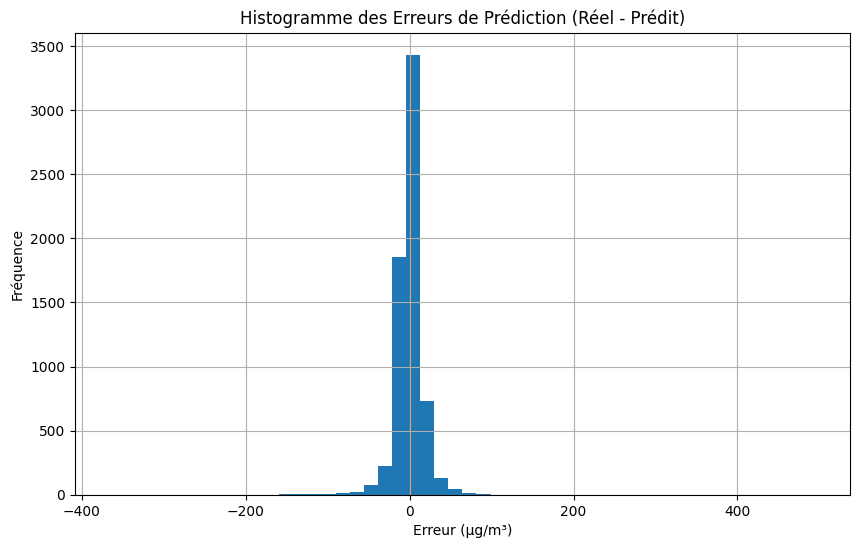


--- 10 Pires Erreurs (Magnitude) ---
Les 10 plus grandes erreurs (en valeur absolue) sont : [136.79075431823728, 144.51322233676908, 148.7935532927513, 162.84268118441105, 166.3061980009079, 215.78507786989212, 219.06273562461138, 229.9050958752632, 365.6005640029907, 494.27492839097977]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Vous devez réutiliser les y_test et y_pred qui correspondent à votre meilleur modèle
# (LSTM Simple, T=24h, issu des tests Q3.1 ou de la Q4.1)

# 1. Calcul des erreurs
# Assurez-vous que y_test et y_pred sont des NumPy arrays ou des listes de même taille
errors = y_test.flatten() - y_pred.flatten()

# 2. Visualisation de l'histogramme des erreurs
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50)
plt.title('Histogramme des Erreurs de Prédiction (Réel - Prédit)')
plt.xlabel('Erreur (µg/m³)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show() # Visualisez le graphique

# 3. Identification des 10 pires prédictions
abs_errors = np.abs(errors)
# Indices des 10 plus grandes erreurs
worst_indices_test = np.argsort(abs_errors)[-10:]
# Afficher la magnitude de l'erreur
print("\n--- 10 Pires Erreurs (Magnitude) ---")
print(f"Les 10 plus grandes erreurs (en valeur absolue) sont : {abs_errors[worst_indices_test].tolist()}")

# **Question BONUS**

# 1. Définition de la Couche d'Attention

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Permute, multiply, Lambda, Dropout
from tensorflow.keras import backend as K

def create_stacked_attention_lstm_model(seq_length, num_features):
    """
    Construit un modèle LSTM Empilé (2 couches) avec un mécanisme d'Attention Global.
    Utilise la couche LSTM la plus performante (50 unités) et y ajoute une seconde couche.
    """

    # --- 1. ENTRÉE ET LSTM EMPILÉ ---
    inputs = Input(shape=(seq_length, num_features))

    # Première couche LSTM (doit retourner des séquences)
    lstm_out_1 = LSTM(units=50, activation='relu', return_sequences=True)(inputs)
    lstm_out_1 = Dropout(0.2)(lstm_out_1) # Ajout d'un Dropout pour régularisation

    # Deuxième couche LSTM (doit retourner des séquences pour l'attention)
    lstm_out_2 = LSTM(units=50, activation='relu', return_sequences=True)(lstm_out_1)

    # --- 2. CALCUL DES SCORES D'ATTENTION ---
    # Le mécanisme est appliqué sur la sortie du dernier LSTM (lstm_out_2)

    # Calcule les scores d'importance pour chaque timestep
    attention_scores = Dense(1, activation='tanh')(lstm_out_2)
    attention_scores = Permute((2, 1))(attention_scores)

    # Softmax pour obtenir les poids d'attention
    attention_weights = tf.keras.activations.softmax(attention_scores)

    # --- 3. APPLICATION DES POIDS ET VECTEUR DE CONTEXTE ---

    lstm_out_2_permuted = Permute((2, 1))(lstm_out_2)

    # Multiplie les sorties LSTM par les poids d'attention
    context_vector = multiply([lstm_out_2_permuted, attention_weights])

    # Somme sur la dimension de la séquence pour obtenir le vecteur de contexte final
    context_vector = Lambda(lambda x: K.sum(x, axis=-1))(context_vector)

    # --- 4. COUCHE DE SORTIE ---
    outputs = Dense(1, activation='linear')(context_vector)

    # --- 5. CONSTRUCTION DU MODÈLE FINAL ---
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')

    return model

# 2. Entraînement et Évaluation du Modèle d'Attention

In [ ]:
# --- PARAMÈTRES (T=24h optimal) ---
# Assurez-vous que seq_length=24 et num_features est correctement défini (ex: 11)
seq_length = 24

# --- 1. CONSTRUCTION ET ENTRAÎNEMENT ---
stacked_attention_lstm_model = create_stacked_attention_lstm_model(seq_length, num_features)

print("Début de l'entraînement du modèle LSTM Empilé avec Attention (50 époques)...")

# Augmentation du nombre d'époques pour permettre au modèle plus complexe de converger
stacked_attention_history = stacked_attention_lstm_model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, Y_val),
    verbose=1
)

# --- 2. ÉVALUATION ET CALCUL DU RMSE ---

# Prédiction
y_pred_scaled_stacked_att = stacked_attention_lstm_model.predict(X_test, verbose=0)

# Dénormalisation de la Prédiction
temp_pred_att = np.zeros((len(y_pred_scaled_stacked_att), num_features))
temp_pred_att[:, pm25_col_index] = y_pred_scaled_stacked_att.flatten()
y_pred_stacked_att = scaler.inverse_transform(temp_pred_att)[:, pm25_col_index]

# Calcul du RMSE
rmse_stacked_attention = np.sqrt(mean_squared_error(y_test, y_pred_stacked_att))

print(f"\n--- Résultat Final (Amélioré) ---")
print(f"RMSE LSTM Simple (Base) : 18.722 µg/m³")
print(f"RMSE LSTM avec Attention Simple : 19.731 µg/m³")
print(f"RMSE LSTM Empilé avec Attention : {rmse_stacked_attention:.3f} µg/m³")

Début de l'entraînement du modèle LSTM Empilé avec Attention (50 époques)...
Epoch 1/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 0.0052 - val_loss: 0.0032
Epoch 2/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 3/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0016 - val_loss: 8.8718e-04
Epoch 4/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 5/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 9.7923e-04 - val_loss: 5.9206e-04
Epoch 6/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 8.2768e-04 - val_loss: 9.9945e-04
Epoch 7/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 7.8520e-04 - val_loss: 6.5073e-04
Epoch 8/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 7.8231e-04 - val_loss: 6.2881e-04
Epoch 9/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 7.0310e-04 - val_loss: 6.0758e-04
Epoch 10/50
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 8.1152e-04 - val_loss: 6.0785e-04
Epoch 11